In [95]:
import numpy as np
import pandas as pd

In [96]:
pip install kmapper

Note: you may need to restart the kernel to use updated packages.


In [97]:
import kmapper as km

In [98]:
import sklearn

In [99]:
import matplotlib.pyplot as plt

In [100]:
tgood_nom =pd.read_csv('Data/Pop_health_DEM_map.csv')

In [101]:
def AnnObsFix(x):
    if x!=x:   #captures the NaN entries 
        return float(0)
    else:
        return x
def nonwhite(x):
    y = 100-x
    return float(y)

def hispanic(x):
    return float(x)

def white(x):
    return float(x)

def pov(x):
    return float(x)
        

tgood_nom['Age.Adjusted.Rate.per.100.000'] = tgood_nom['Age.Adjusted.Rate.per.100.000'].apply(AnnObsFix)
tgood_nom['Pct_White'].apply(white)
tgood_nom['Pct_nonWhite'] = tgood_nom['Pct_White'].apply(nonwhite)
tgood_nom['Pct_Hisp'] = tgood_nom['Pct_Hisp'].apply(hispanic)
tgood_nom['Pct_pvty'] = tgood_nom['Pct_pvty'].apply(pov)


mapdata = np.array([tgood_nom['Age.Adjusted.Rate.per.100.000'], tgood_nom['Pct_White'], tgood_nom['Pct_nonWhite'], tgood_nom['Pct_Hisp'], tgood_nom['Pct_pvty'] ])
mapdata = mapdata.transpose()

In [102]:
print(mapdata)

[[ 46.          94.60766084   5.39233916   3.27259204  16.        ]
 [ 88.          87.06107807  12.93892193   6.38824945  17.3       ]
 [ 94.          88.18565289  11.81434711   7.74963297   8.4       ]
 [ 83.          90.93118065   9.06881935   7.6621939   12.9       ]
 [ 97.          92.50268485   7.49731515   4.02626087  10.2       ]
 [ 68.          89.80854338  10.19145662   5.37886839  17.4       ]
 [ 94.          92.67327677   7.32672323   6.97397273  12.        ]
 [ 56.          91.9960651    8.0039349    5.37023788  14.8       ]
 [113.          92.16460728   7.83539272   7.42900978   8.7       ]
 [115.          92.38763967   7.61236033   4.6950319   16.5       ]
 [101.          95.18973811   4.81026189   4.70336718  10.4       ]
 [ 79.          94.96306246   5.03693754   2.78038952  15.6       ]
 [ 94.          91.87550525   8.12449475   3.96119644  16.2       ]
 [106.          83.09317104  16.90682896  29.48626152  10.9       ]
 [ 86.          88.66470478  11.33529522  10.700

In [103]:
#A

# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_data = mapper.fit_transform(mapdata, projection= [0,4])

clusterer = clusterer=sklearn.cluster.DBSCAN(eps=15, min_samples=1)

# Create a cover with 10 elements
cover = km.Cover(n_cubes=5, perc_overlap = 0.5)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, mapdata, cover=cover, clusterer = clusterer, remove_duplicate_nodes = True
                )

# Visualize it
_ = mapper.visualize(graph, title="Data Type by Annual Average Observations")


##use an IFrame to display a vis with a set width and height
from IPython.display import IFrame
IFrame(src="mapper_visualization_output.html", width=800, height=600)
#print(graph['nodes'])

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [0, 4]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (75, 5)

..Projecting data using: [0, 4]

..Scaling with: MinMaxScaler()

Mapping on data shaped (75, 5) using lens shaped (75, 2)

Minimal points in hypercube before clustering: 1
Creating 25 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 2 clusters in hypercube 2.
   > Found 2 clusters in hypercube 3.
   > Found 2 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 3 clusters in hypercube 6.
   > Found 3 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 3 clusters in hypercube 9.
   > Found 2 clusters in hypercube 10.
   > Found 3 clusters in hypercube 11.
   > Found 3 clusters in hypercube 12.
   > Found 2 clusters in hypercube 13.
   > Found 3 clusters in hypercube 14.
   > Found 3 clusters in hypercube 15.
   > Found 5

In [104]:
print(tgood_nom[['StCtyName','Pct_Hisp','Age.Adjusted.Rate.per.100.000', 'Pct_White', 'Pct_nonWhite', 'Pct_pvty']].loc[[24]])

       StCtyName   Pct_Hisp  Age.Adjusted.Rate.per.100.000  Pct_White  \
24  MorrowOregon  31.298666                          100.0  77.687282   

    Pct_nonWhite  Pct_pvty  
24     22.312718      13.8  


B
The KMapper visulization above the data is mapped by cancer rate and poverty with an epsilon value of 15. The clusters are counties that have similar cancer rates or similar levels of poverty. The clusters that are not connected to the main cluster are counties that are either so small that they have not enough data to have an acurate cancer rate, or have an very high or low cancer rate or poverty perctage when compared to the rest of the counties. 

C
We see that most counties are connected together in a single graph, this means that most counties in Washington and Oregon have a similar cancer rate when compared against poverty rate. 

D
We are still slightly confused on how to properly code KMapper into doing exactly what we want, so our results may not be 100% accurate.

In [105]:
def DataType2quant(x): #an if statement that is handy to use to convert qualitative entries to quantitative ones
    if x=="Mortality":
        return int(1)
    elif x=="Incidence":
        return int(-1)
    else:
        return int(0)
    
    
def AnnObsFix(x):
    if x!=x:   #captures the NaN entries 
        return int(0)
    else:
        return x
    
    
tgood_nom["Data.Type"] = tgood_nom["Data.Type"].apply(DataType2quant) #notice that we are modifying the original data_train
#tgood["Average.Annual.Population"] = tgood["Average.Annual.Population"].apply(AnnPopFix)
tgood_nom["Age.Adjusted.Rate.per.100.000"] = tgood_nom["Age.Adjusted.Rate.per.100.000"].apply(AnnObsFix)

sub_tgood_nom = np.array([tgood_nom["Data.Type"],tgood_nom["Pct_pvty"],tgood_nom["Age.Adjusted.Rate.per.100.000"] ]) #entered as rows
sub_tgood_nom = sub_tgood_nom.transpose() #got back into columns

In [106]:
print(sub_tgood_nom)

[[ -1.   16.   46. ]
 [ -1.   17.3  88. ]
 [ -1.    8.4  94. ]
 [ -1.   12.9  83. ]
 [ -1.   10.2  97. ]
 [ -1.   17.4  68. ]
 [ -1.   12.   94. ]
 [ -1.   14.8  56. ]
 [ -1.    8.7 113. ]
 [ -1.   16.5 115. ]
 [ -1.   10.4 101. ]
 [ -1.   15.6  79. ]
 [ -1.   16.2  94. ]
 [ -1.   10.9 106. ]
 [ -1.   13.5  86. ]
 [ -1.   15.9 101. ]
 [ -1.   16.8  82. ]
 [ -1.   19.1  92. ]
 [ -1.   15.7  77. ]
 [ -1.   14.4  90. ]
 [ -1.   15.2  92. ]
 [ -1.   12.1 100. ]
 [ -1.   20.   46. ]
 [ -1.   13.3  96. ]
 [ -1.   13.8 100. ]
 [ -1.   12.4  97. ]
 [ -1.   11.   93. ]
 [ -1.   12.8   0. ]
 [ -1.   14.6  78. ]
 [ -1.   13.2 100. ]
 [ -1.   17.5 100. ]
 [ -1.   12.9  73. ]
 [ -1.   13.3  99. ]
 [ -1.    8.6  91. ]
 [ -1.   17.4   0. ]
 [ -1.   10.9  81. ]
 [ -1.   16.   85. ]
 [ -1.   13.9  58. ]
 [ -1.   10.6  88. ]
 [ -1.   10.8 112. ]
 [ -1.   12.  110. ]
 [ -1.    9.   71. ]
 [ -1.   13.2  97. ]
 [ -1.   12.6  69. ]
 [ -1.   10.  115. ]
 [ -1.   17.5  41. ]
 [ -1.   11.8  94. ]
 [ -1.   13.2

Text(0.5, 0, 'Age ajusted rate')

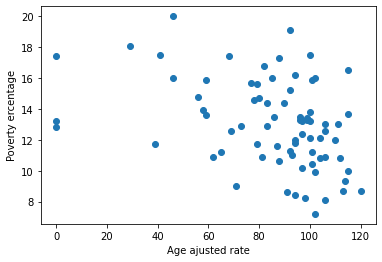

In [107]:
#E
plt.scatter(sub_tgood_nom[:, 2], sub_tgood_nom[:, 1], marker='o' )
plt.ylabel('Poverty ercentage')
plt.xlabel('Age ajusted rate')

In the graph you can see how most counties are grouped close together on the rigt side of the graph, then there are a few outlier couties around the edges of the graph. This is consistent with our KMapper visualization as most counties are grouped together in one graph.